# Introduction

Notebook to aggregate the running of models in the context of traceability between **features** and **bug reports**.

# Load Libraries and Datasets

In [53]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

from modules.models_runner import feat_br_strat_runner
from modules.utils import aux_functions
from modules.utils import firefox_dataset_p2 as fd

import warnings; warnings.simplefilter('ignore')

features = fd.Datasets.read_features_df()
bugreports = fd.Datasets.read_selected_bugreports_df()

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)


# Run All Models

## Intersec Strategy

In [54]:
exp_vol_intersec_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Intersec_Strat_Runner()
exp_vol_intersec_strat_runner.execute()

evaluator_2 = exp_vol_intersec_strat_runner.get_evaluator() 
evals_df_2 = exp_vol_intersec_strat_runner.get_evals_df()

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running LSI model -----
Running LDA model -----
Running BM25 model -----
Running W2V model -----
Evaluating LSI Model ----- 
Evaluating LDA Model ----- 
Evaluating BM25 Model ----- 
Evaluating WORDVECTOR Model ----- 


### Results

In [55]:
evals_df_2.head()

,model,ref_name,perc_precision,perc_recall,perc_fscore,sim_threshold,top,trace_links_df
0,lsi,top_1_cosine_0.0,26.37,70.59,38.4,0.0,1.0,Bug_Number 1248267 1248268 1257087 1264988 1267480 1267501 \ feat_name new_awesome_bar 0 1 1 1 0 1 windows_child_mode 0 0 0 0 0 0 apz_async_scrolling 0 0 0 0 0 ...
1,lsi,top_1_cosine_0.1,26.37,70.59,38.4,0.1,1.0,Bug_Number 1248267 1248268 1257087 1264988 1267480 1267501 \ feat_name new_awesome_bar 0 1 1 1 0 1 windows_child_mode 0 0 0 0 0 0 apz_async_scrolling 0 0 0 0 0 ...
2,lsi,top_1_cosine_0.2,26.37,70.59,38.4,0.2,1.0,Bug_Number 1248267 1248268 1257087 1264988 1267480 1267501 \ feat_name new_awesome_bar 0 1 1 1 0 1 windows_child_mode 0 0 0 0 0 0 apz_async_scrolling 0 0 0 0 0 ...
3,lsi,top_1_cosine_0.3,26.37,70.59,38.4,0.3,1.0,Bug_Number 1248267 1248268 1257087 1264988 1267480 1267501 \ feat_name new_awesome_bar 0 1 1 1 0 1 windows_child_mode 0 0 0 0 0 0 apz_async_scrolling 0 0 0 0 0 ...
4,lsi,top_1_cosine_0.4,26.37,70.59,38.4,0.4,1.0,Bug_Number 1248267 1248268 1257087 1264988 1267480 1267501 \ feat_name new_awesome_bar 0 1 1 1 0 1 windows_child_mode 0 0 0 0 0 0 apz_async_scrolling 0 0 0 0 0 ...


In [56]:
evals_df_2_1 = evals_df_2[evals_df_2.top != 19.0]
aux_functions.highlight_df( evals_df_2_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

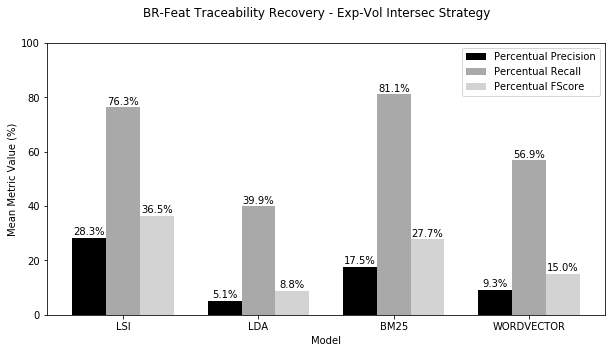

In [57]:
evaluator_2.plot_evaluations_3(evals_df_2_1, title='BR-Feat Traceability Recovery - Exp-Vol Intersec Strategy')

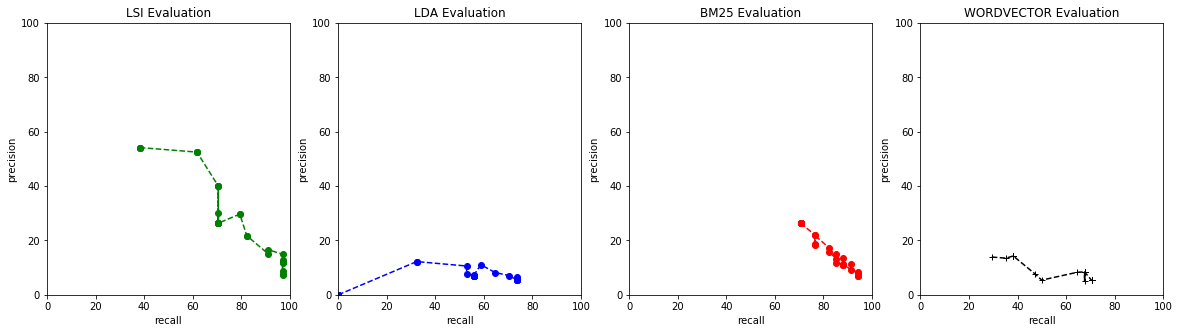

In [58]:
evaluator_2.plot_evaluations_4(evals_df_2_1)

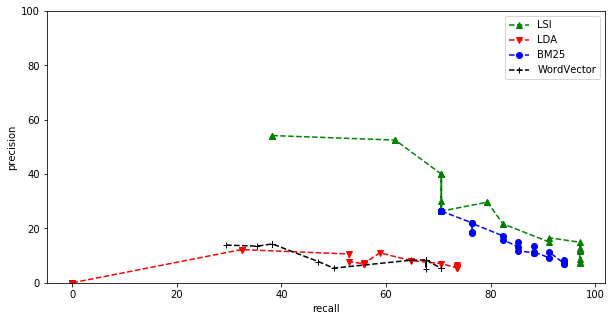

In [59]:
evaluator_2.plot_evaluations_5(evals_df_2_1)

### Oracle True Traces

In [60]:
oracle_true_traces_inter = aux_functions.get_oracle_true_positives(exp_vol_intersec_strat_runner)
print('len(oracle_true_traces_inter): {}'.format(len(oracle_true_traces_inter)))

len(oracle_true_traces_inter): 34


#### Oracle

In [61]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_evaluator().get_oracle_df().head())

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388,1279140,1279143,1279864,1281190,1281493,1282759,1283542,1285041,1285328,1287384,1287687,1287748,1287823,1289240,1289832,1290424,1291770,1292566,1292573,1293308,1294733,1294887,1295502,1296322,1296366,1296861,1297336,1297374,1297686,1297976,1299458,1300738,1301056,1301421,1301784,1302468,1303339,1305195,1305676,1305737,1306639,1309856,1311998,1312018,1313290,1313778,1313969,1314643,1316126,1318903,1319119,1319433,1319919,1320557,1323211,1325902,1328913,1330745,1334844,1335538,1335992,1336227,1337682,1339497,1343256,1344446,1345687,1352539,1353831,1357085,1357458,1365887,1408361,1430603,1432915,1449700,1451475
new_awesome_bar,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,0,0
windows_child_mode,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
apz_async_scrolling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
browser_customization,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
pdf_viewer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Retrieved Traces - Similarity Threshold 0.0

In [62]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[1,3,5], sim_threshs=[0.0])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall
0,1,0.0,lsi,24,67,10,26.37,70.59
3,1,0.0,lda,0,91,34,0.00,0.00
6,1,0.0,bm25,24,67,10,26.37,70.59
9,1,0.0,wordvector,13,78,21,14.29,38.24
1,3,0.0,lsi,33,240,1,12.09,97.06
4,3,0.0,lda,19,254,15,6.96,55.88
7,3,0.0,bm25,30,243,4,10.99,88.24
10,3,0.0,wordvector,23,250,11,8.42,67.65
2,5,0.0,lsi,33,422,1,7.25,97.06
5,5,0.0,lda,25,430,9,5.49,73.53


#### Traces Not Captured by Any Technique

In [63]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))

TOP 1 --------------------------
len(not_captured_traces): 7
percent not_captured_traces: 7/34 * 100 : 20.59%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


TOP 5 --------------------------
len(not_captured_traces): 0
percent not_captured_traces: 0/34 * 100 : 0.0%


#### Traces Captured by Every Technique

In [64]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%


TOP 3 -----------------------
len(traces_captured_by_all): 18
percent traces_captured_by_all: 18/34 * 100 : 52.94%


TOP 5 -----------------------
len(traces_captured_by_all): 23
percent traces_captured_by_all: 23/34 * 100 : 67.65%


#### Similarity Matrices Analysis

##### **LDA**

In [65]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix())

##### **LSI**

In [66]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix())

##### **BM25**

In [67]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix())

##### **Word Vector**

In [68]:
import numpy as np

wv_sim_matrix = exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix()

wv_sim_values = []
for idx,row in wv_sim_matrix.iterrows():
    for col in wv_sim_matrix.columns:
        wv_sim_values.append(wv_sim_matrix.at[idx,col])

print("Mean Similarity Value: {}".format(np.mean(wv_sim_values)))
print("Std Similarity Value: {}".format(np.std(wv_sim_values)))

aux_functions.highlight_df(wv_sim_matrix)

Mean Similarity Value: 0.8616428384184254
Std Similarity Value: 0.05845638042856232


#### LDA Topics

In [69]:
exp_vol_intersec_strat_runner.get_lda_model().print_topics()

Topic #0: webgl firefox window compat page web open bar tab taskbar
Topic #1: loud speech read html extens text desktop content page use
Topic #2: element stop default http branch set code info forward field
Topic #3: capabl librari render browser firefox http branch element stop default
Topic #4: custom firefox default browser http branch element stop set appear
Topic #5: element stop default http branch set code info forward field
Topic #6: element stop default http branch set code info forward field
Topic #7: menu context option displayport portion apz new zoom pan gecko
Topic #8: download dropmak notif option display http branch element stop default
Topic #9: element stop default http branch set code info forward field
Topic #10: mous lock pointer movement cursor exampl game api rotat click
Topic #11: child certif mode connect account ssl present activ parent doe
Topic #12: indic zoom devic permiss valu need thi user notif default
Topic #13: reader mode firefox shown loud speech re

#### True Positives Analysis

In [70]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [71]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('new_awesome_bar', 1296366)}

len(bm25_exc_set): 1


LSI Exclusive TP:


{('downloads_dropmaker', 1292573), ('new_awesome_bar', 1297374)}

len(lsi_exc_set): 2


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


{('new_awesome_bar', 1297976)}

len(wv_exc_set): 1


TOP 3 ------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}

len(bm25_exc_set): 1


LSI Exclusive TP:


{('browser_customization', 1318903),
 ('downloads_dropmaker', 1292573),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}

len(lsi_exc_set): 4


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


set()

len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive TP:


{('downloads_dropmaker', 1432915)}

len(bm25_exc_set): 1


LSI Exclusive TP:


set()

len(lsi_exc_set): 0


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


set()

len(wv_exc_set): 0



,BM25,LSI,LDA,WordVector
TOP 1,1,2,0,1
TOP 3,1,4,0,0
TOP 5,1,0,0,0


#### False Positives Analysis

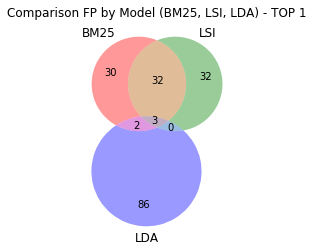

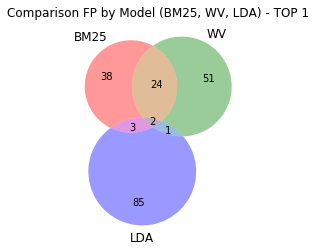

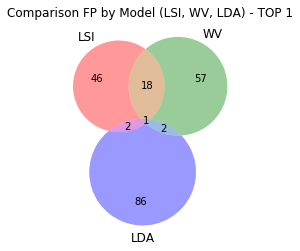

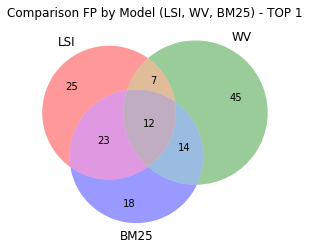

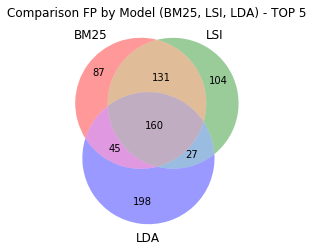

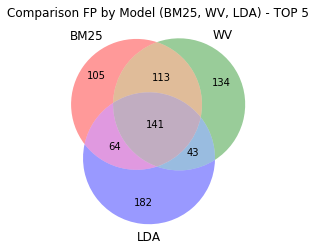

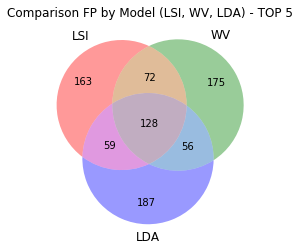

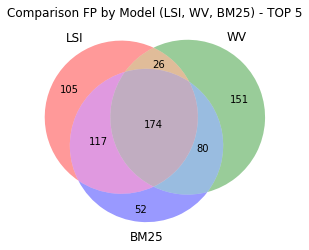

In [72]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [73]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 17


LSI Exclusive FP:
len(lsi_exc_set): 25


LDA Exclusive FP:
len(lda_exc_set): 85


WV Exclusive FP:
len(wv_exc_set): 44


TOP 5 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 33


LSI Exclusive FP:
len(lsi_exc_set): 91


LDA Exclusive FP:
len(lda_exc_set): 168


WV Exclusive FP:
len(wv_exc_set): 121


#### False Negatives Analysis

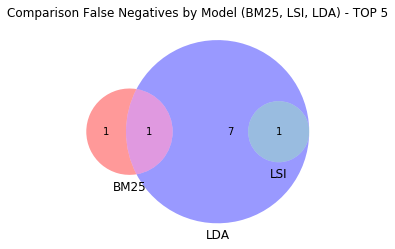

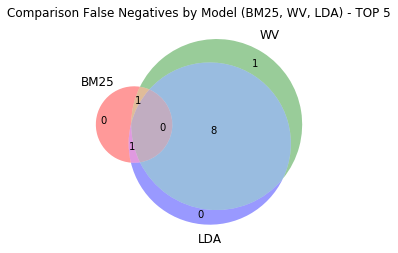

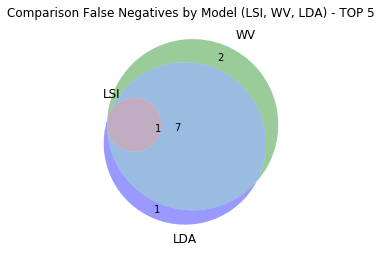

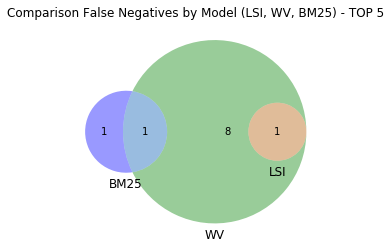

In [74]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FN')

aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'False Negatives')

##### Exclusive Traces

In [75]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN')

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN')

TOP 1 ------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 11


WV Exclusive FN:
len(wv_exc_set): 0


TOP 5 -------------------------------
BM25 Exclusive FN:
len(bm25_exc_set): 0


LSI Exclusive FN:
len(lsi_exc_set): 0


LDA Exclusive FN:
len(lda_exc_set): 0


WV Exclusive FN:
len(wv_exc_set): 1


##### **LDA**

In [76]:
aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']]

,feat,br,br_summary
0,new_awesome_bar,1365887,Can't open resource:///modules/ from the location bar
1,new_awesome_bar,1353831,OneOff block in search bar doesn't update text if Customize was opened at least once
2,new_awesome_bar,1337682,using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).
3,new_awesome_bar,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word
4,new_awesome_bar,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input
5,new_awesome_bar,1335992,Search with default search engine stops working
6,new_awesome_bar,1294887,Middle clicking search results does not open a new tab
7,context_menu,1270983,Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -
8,context_menu,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
9,context_menu,1299458,Telemetry data from Search bar is not properly collected when searching in new tab from context menu


In [77]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]])

Bug_Number,1365887,1353831,1337682,1301421,1279864,1335992,1294887,1270983,1248267,1299458,1334844
feat_name,,,,,,,,,,,
new_awesome_bar,0.800213,0.945485,0.965392,0.81112,0.87502,0.952221,0.993985,0.876709,0.819873,0.93149,0.994299
windows_child_mode,0.380811,0.504059,0.430215,0.425339,0.431626,0.438368,0.451453,0.376782,0.38372,0.413517,0.403396
apz_async_scrolling,0.592938,0.100934,0.233028,0.510611,0.42405,0.0497479,0.0375015,0.494621,0.555395,0.324393,0.0306721
browser_customization,0.147356,0.300992,0.0635576,0.0813945,0.0738469,0.226194,0.065498,0.0838312,0.084284,0.0758315,0.0567898
pdf_viewer,0.192325,0.150401,0.194899,0.352992,0.306042,0.193736,0.0560188,0.0720967,0.181913,0.157623,0.0668428
context_menu,0.844958,0.443445,0.573095,0.780128,0.721338,0.400596,0.397656,0.776754,0.817121,0.643727,0.391743
w10_comp,0.801084,0.946185,0.965769,0.81199,0.875716,0.952873,0.994249,0.877382,0.820732,0.932101,0.994476
tts_in_desktop,0.0584014,0.141716,0.0417733,0.0539073,0.0481993,0.0596751,0.0452432,0.058755,0.0569175,0.0507462,0.0378915
tts_in_rm,0.0586117,0.0547992,0.0419414,0.0541195,0.0483972,0.0598757,0.0453996,0.0589487,0.0571287,0.0509398,0.0380373


In [78]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1 - set([1270983,1248267,1299458])]])

Bug_Number,1365887,1353831,1337682,1301421,1279864,1335992,1294887,1270983,1248267,1299458,1334844
feat_name,,,,,,,,,,,
new_awesome_bar,0.800213,0.945485,0.965392,0.81112,0.87502,0.952221,0.993985,0.876709,0.819873,0.93149,0.994299
windows_child_mode,0.380811,0.504059,0.430215,0.425339,0.431626,0.438368,0.451453,0.376782,0.38372,0.413517,0.403396
apz_async_scrolling,0.592938,0.100934,0.233028,0.510611,0.42405,0.0497479,0.0375015,0.494621,0.555395,0.324393,0.0306721
browser_customization,0.147356,0.300992,0.0635576,0.0813945,0.0738469,0.226194,0.065498,0.0838312,0.084284,0.0758315,0.0567898
pdf_viewer,0.192325,0.150401,0.194899,0.352992,0.306042,0.193736,0.0560188,0.0720967,0.181913,0.157623,0.0668428
context_menu,0.844958,0.443445,0.573095,0.780128,0.721338,0.400596,0.397656,0.776754,0.817121,0.643727,0.391743
w10_comp,0.801084,0.946185,0.965769,0.81199,0.875716,0.952873,0.994249,0.877382,0.820732,0.932101,0.994476
tts_in_desktop,0.0584014,0.141716,0.0417733,0.0539073,0.0481993,0.0596751,0.0452432,0.058755,0.0569175,0.0507462,0.0378915
tts_in_rm,0.0586117,0.0547992,0.0419414,0.0541195,0.0483972,0.0598757,0.0453996,0.0589487,0.0571287,0.0509398,0.0380373


##### **LSI**

No exclusive False Negative traces for Top 1 and Top 5

##### **BM25**

No exclusive False Negative traces for Top 1 and Top 5

##### **Word Vector**

In [79]:
aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']]

,feat,br,br_summary
0,downloads_dropmaker,1287384,Incorrect alignment of Summary section in Downloads panel


In [80]:
aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]])

Bug_Number,1287384
feat_name,
new_awesome_bar,0.89762
windows_child_mode,0.899505
apz_async_scrolling,0.885475
browser_customization,0.773195
pdf_viewer,0.808473
context_menu,0.890064
w10_comp,0.879205
tts_in_desktop,0.882082
tts_in_rm,0.881948


### Retrieved Traces - Similarity Threshold 0.9

In [81]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_vol_intersec_strat_runner.get_oracle(), evals_df=evals_df_2, top_values=[1,3,5], sim_threshs=[0.9])
retrieved_traces_df[['top','sim_thresh','model','TP_amount','FP_amount','FN_amount','precision','recall']].head(50)

,top,sim_thresh,model,TP_amount,FP_amount,FN_amount,precision,recall
0,1,0.9,lsi,13,11,21,54.17,38.24
3,1,0.9,lda,0,32,34,0.00,0.00
6,1,0.9,bm25,24,67,10,26.37,70.59
9,1,0.9,wordvector,10,62,24,13.89,29.41
1,3,0.9,lsi,13,11,21,54.17,38.24
4,3,0.9,lda,11,79,23,12.22,32.35
7,3,0.9,bm25,26,92,8,22.03,76.47
10,3,0.9,wordvector,16,189,18,7.80,47.06
2,5,0.9,lsi,13,11,21,54.17,38.24
5,5,0.9,lda,11,79,23,12.22,32.35


#### Traces Not Captured by Any Technique

In [82]:
import pprint

print('TOP 1 --------------------------')
all_captured_traces_t1_inter = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_inter = oracle_true_traces_inter - all_captured_traces_t1_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_inter), len(oracle_true_traces_inter), len(not_captured_traces_t1_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t1_inter)

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_inter = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_inter = oracle_true_traces_inter - all_captured_traces_t3_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_inter), len(oracle_true_traces_inter), len(not_captured_traces_t3_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t3_inter)

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_inter = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_inter = oracle_true_traces_inter - all_captured_traces_t5_inter
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_inter)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_inter), len(oracle_true_traces_inter), len(not_captured_traces_t5_inter)/len(oracle_true_traces_inter)*100))
pprint.pprint(not_captured_traces_t5_inter)

TOP 1 --------------------------
len(not_captured_traces): 10
percent not_captured_traces: 10/34 * 100 : 29.41%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1297374),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1352539),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 3 --------------------------
len(not_captured_traces): 6
percent not_captured_traces: 6/34 * 100 : 17.65%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 1432915),
 ('pdf_viewer', 1301056),
 ('zoom_indicator', 1305195)}


TOP 5 --------------------------
len(not_captured_traces): 5
percent not_captured_traces: 5/34 * 100 : 14.71%
{('browser_customization', 1318903),
 ('browser_customization', 1357458),
 ('downloads_dropmaker', 1292573),
 ('downloads_dropmaker', 143291

#### Traces Captured by Every Technique

In [83]:
import pprint

print('TOP 1 -----------------------')
traces_captured_by_all_t1_inter = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t1_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t1_inter)

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_inter = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t3_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t3_inter)

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_inter = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_inter)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_inter), len(oracle_true_traces_inter), len(traces_captured_by_all_t5_inter)/len(oracle_true_traces_inter) *100))
pprint.pprint(traces_captured_by_all_t5_inter)

TOP 1 -----------------------
len(traces_captured_by_all): 0
percent traces_captured_by_all: 0/34 * 100 : 0.0%
set()


TOP 3 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


TOP 5 -----------------------
len(traces_captured_by_all): 5
percent traces_captured_by_all: 5/34 * 100 : 14.71%
{('new_awesome_bar', 1293308),
 ('new_awesome_bar', 1294733),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682)}


#### True Positives Analysis

In [84]:
bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'TP')
bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'TP')
bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'TP')
#aux_functions.plot_venn_diagrams(TOP, bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, 'True Positives')

##### Exclusive Traces

In [85]:
import pandas as pd

print("TOP 1 ------------------------------")
bm25_tp_exc_set_t1, lsi_tp_exc_set_t1, lda_tp_exc_set_t1, wv_tp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_tp_set_t1, lsi_tp_set_t1, lda_tp_set_t1, wv_tp_set_t1, traces_type='TP', verbose=True)

print("\n\nTOP 3 ------------------------------")
bm25_tp_exc_set_t3, lsi_tp_exc_set_t3, lda_tp_exc_set_t3, wv_tp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_tp_set_t3, lsi_tp_set_t3, lda_tp_set_t3, wv_tp_set_t3, traces_type='TP', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_tp_exc_set_t5, lsi_tp_exc_set_t5, lda_tp_exc_set_t5, wv_tp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_tp_set_t5, lsi_tp_set_t5, lda_tp_set_t5, wv_tp_set_t5, traces_type='TP', verbose=True)

df = pd.DataFrame(index=['TOP 1', 'TOP 3', 'TOP 5'], columns=['BM25','LSI','LDA','WordVector'])

df.at['TOP 1','BM25'] = len(bm25_tp_exc_set_t1)
df.at['TOP 3','BM25'] = len(bm25_tp_exc_set_t3)
df.at['TOP 5','BM25'] = len(bm25_tp_exc_set_t5)

df.at['TOP 1','LSI'] = len(lsi_tp_exc_set_t1)
df.at['TOP 3','LSI'] = len(lsi_tp_exc_set_t3)
df.at['TOP 5','LSI'] = len(lsi_tp_exc_set_t5)

df.at['TOP 1','LDA'] = len(lda_tp_exc_set_t1)
df.at['TOP 3','LDA'] = len(lda_tp_exc_set_t3)
df.at['TOP 5','LDA'] = len(lda_tp_exc_set_t5)

df.at['TOP 1','WordVector'] = len(wv_tp_exc_set_t1)
df.at['TOP 3','WordVector'] = len(wv_tp_exc_set_t3)
df.at['TOP 5','WordVector'] = len(wv_tp_exc_set_t5)

print()

df

TOP 1 ------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1311998),
 ('new_awesome_bar', 1339497),
 ('new_awesome_bar', 1357458)}

len(bm25_exc_set): 8


LSI Exclusive TP:


set()

len(lsi_exc_set): 0


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


set()

len(wv_exc_set): 0


TOP 3 ------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1339497)}

len(bm25_exc_set): 6


LSI Exclusive TP:


set()

len(lsi_exc_set): 0


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


{('new_awesome_bar', 1279143), ('new_awesome_bar', 1352539)}

len(wv_exc_set): 2


TOP 5 -------------------------------
BM25 Exclusive TP:


{('context_menu', 1270983),
 ('indicator_device_perm', 1296322),
 ('indicator_device_perm', 1296861),
 ('indicator_device_perm', 1345687),
 ('new_awesome_bar', 1297976),
 ('new_awesome_bar', 1339497)}

len(bm25_exc_set): 6


LSI Exclusive TP:


set()

len(lsi_exc_set): 0


LDA Exclusive TP:


set()

len(lda_exc_set): 0


WV Exclusive TP:


{('new_awesome_bar', 1279143),
 ('new_awesome_bar', 1352539),
 ('zoom_indicator', 1305195)}

len(wv_exc_set): 3



,BM25,LSI,LDA,WordVector
TOP 1,8,0,0,0
TOP 3,6,0,0,2
TOP 5,6,0,0,3


##### Details of Exclusive Traces

In [86]:
display(aux_functions.detail_features_br(bm25_tp_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(bm25_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_tp_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

,feat,br,br_summary
0,new_awesome_bar,1311998,[One-off searches] Right click on a result from Awesomebar closes the dropdown
1,new_awesome_bar,1339497,firefox tries to load incorrect url if urlbar autocomplete suggests first-two-letters-duplicated hosts when input url contains % encoded components
2,indicator_device_perm,1296861,[control center] Don't hardcode colors for the permission status and permission removal button
3,indicator_device_perm,1345687,[Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar
4,new_awesome_bar,1357458,After Customization - typed text in the Awesome bar doesn't correspond with the text from One-Off-Searches bar
5,new_awesome_bar,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
6,context_menu,1270983,Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -
7,indicator_device_perm,1296322,X button is vertically misaligned on the permission dropdown


,feat,br,br_summary
0,new_awesome_bar,1339497,firefox tries to load incorrect url if urlbar autocomplete suggests first-two-letters-duplicated hosts when input url contains % encoded components
1,indicator_device_perm,1296861,[control center] Don't hardcode colors for the permission status and permission removal button
2,indicator_device_perm,1345687,[Regression] Clicking on audioVideoButton / sharing-icon don't work when typed on urlbar
3,new_awesome_bar,1297976,[One-off searches] Screen reader does not read the one-offs searches buttons
4,context_menu,1270983,Intermittent browser_contextmenu.jsTest timed outFound a tab after previous test timed out: subtst_contextmenu.html -
5,indicator_device_perm,1296322,X button is vertically misaligned on the permission dropdown


,feat,br,br_summary
0,new_awesome_bar,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened"
1,new_awesome_bar,1352539,Move defaultenginename pref setting into list.json


,feat,br,br_summary
0,new_awesome_bar,1279143,"color indicator missing when ""File -> New Container Tab"" without any windows opened"
1,zoom_indicator,1305195,"In private browsing mode, zoom level indicator is unreadable when dark developer edition theme is in use"
2,new_awesome_bar,1352539,Move defaultenginename pref setting into list.json


**LSI vs BM25 Similarity Matrices Comparison - TOP 1**

In [87]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t1]]))

Bug_Number,1311998,1339497,1296861,1345687,1357458,1296366,1270983,1296322
feat_name,,,,,,,,
new_awesome_bar,0.898936,0.826803,0.0315864,0.311237,0.892523,0.693017,0.289878,0.377698
windows_child_mode,0.108948,0.12627,0.284277,0.180943,0.0555075,0.0730247,0.108769,0.183085
apz_async_scrolling,0.0721848,0.0534401,0.00489308,0.0501394,0.145843,0.209625,0.0203494,0.0183967
browser_customization,0.121047,0.277876,0.314417,0.118989,0.399604,0.0775948,0.260579,0.113718
pdf_viewer,0.0253266,0.0499455,0.0222256,0.0111617,0.0141717,0.0358291,0.0924323,0.0107006
context_menu,0.243376,0.0981013,0.0184743,0.176417,0.21472,0.352094,0.878534,0.252091
w10_comp,0.458524,0.346784,0.0925892,0.487576,0.1531,0.719517,0.384114,0.266645
tts_in_desktop,0.0839811,0.188648,0.0736986,0.114003,0.241947,0.0637309,0.199935,0.0879883
tts_in_rm,0.111367,0.255654,0.392525,0.139499,0.214808,0.0713896,0.239741,0.0881227


Bug_Number,1311998,1339497,1296861,1345687,1357458,1296366,1270983,1296322
feat_name,,,,,,,,
new_awesome_bar,1,1,0.0471014,0.702267,1,1,0.414966,0.549101
windows_child_mode,0.155342,0.0849058,0.947978,0.518162,0.0985813,0.187932,0.113428,0.504034
apz_async_scrolling,0.0757604,0.0286512,0.279952,0.195092,0.228024,0.238719,0,0.100819
browser_customization,0.0780182,0.106039,0.470282,0.120368,0.317365,0.0470683,0.251651,0.130627
pdf_viewer,0.0211689,0.0135817,0.00557296,0.00481392,0.0132802,0.0172182,0.123167,0.002206
context_menu,0.379623,0.113636,0.0800291,0.584704,0.254063,0.808555,1,0.54438
w10_comp,0.442163,0.174183,0.0877836,0.966451,0.164083,0.94915,0.46177,0.399954
tts_in_desktop,0.0656172,0.0861399,0.0823852,0.167842,0.203594,0.0394202,0.221276,0.0879753
tts_in_rm,0.0744387,0.100797,0.43978,0.165463,0.203989,0.0427416,0.238506,0.0922578


**LSI vs BM25 Similarity Matrices Comparison - TOP 3 and 5**

In [88]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in bm25_tp_exc_set_t3]]))

Bug_Number,1339497,1296861,1345687,1297976,1270983,1296322
feat_name,,,,,,
new_awesome_bar,0.826803,0.0315864,0.311237,0.381322,0.289878,0.377698
windows_child_mode,0.12627,0.284277,0.180943,0.150427,0.108769,0.183085
apz_async_scrolling,0.0534401,0.00489308,0.0501394,0.0668662,0.0203494,0.0183967
browser_customization,0.277876,0.314417,0.118989,0.10959,0.260579,0.113718
pdf_viewer,0.0499455,0.0222256,0.0111617,0.0060657,0.0924323,0.0107006
context_menu,0.0981013,0.0184743,0.176417,0.163886,0.878534,0.252091
w10_comp,0.346784,0.0925892,0.487576,0.40927,0.384114,0.266645
tts_in_desktop,0.188648,0.0736986,0.114003,0.200987,0.199935,0.0879883
tts_in_rm,0.255654,0.392525,0.139499,0.806383,0.239741,0.0881227


Bug_Number,1339497,1296861,1345687,1297976,1270983,1296322
feat_name,,,,,,
new_awesome_bar,1,0.0471014,0.702267,0.97158,0.414966,0.549101
windows_child_mode,0.0849058,0.947978,0.518162,0.493843,0.113428,0.504034
apz_async_scrolling,0.0286512,0.279952,0.195092,0.245191,0,0.100819
browser_customization,0.106039,0.470282,0.120368,0.161104,0.251651,0.130627
pdf_viewer,0.0135817,0.00557296,0.00481392,0.00976845,0.123167,0.002206
context_menu,0.113636,0.0800291,0.584704,0.62847,1,0.54438
w10_comp,0.174183,0.0877836,0.966451,0.637784,0.46177,0.399954
tts_in_desktop,0.0861399,0.0823852,0.167842,0.290998,0.221276,0.0879753
tts_in_rm,0.100797,0.43978,0.165463,1,0.238506,0.0922578


**BM25 vs WV Similarity Matrices Comparison - TOP 3**

In [89]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_bm25_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_tp_exc_set_t5]]))

Bug_Number,1279143,1305195,1352539
feat_name,,,
new_awesome_bar,0.754196,0.901039,0.724286
windows_child_mode,0.273732,0.840382,0.810596
apz_async_scrolling,0.132891,0.587734,0.0765077
browser_customization,0.0166754,0.683777,0.455234
pdf_viewer,0.078464,0.498819,0.00324273
context_menu,1,0.893007,1
w10_comp,0.735776,0.715865,0.0510785
tts_in_desktop,0.00252657,0.458815,0.0479374
tts_in_rm,0.0136337,1,0.0568077


Bug_Number,1279143,1305195,1352539
feat_name,,,
new_awesome_bar,0.926406,0.925227,0.952492
windows_child_mode,0.922681,0.938881,0.954998
apz_async_scrolling,0.912454,0.916012,0.944141
browser_customization,0.797496,0.831176,0.800393
pdf_viewer,0.816427,0.847069,0.794356
context_menu,0.931017,0.914766,0.90993
w10_comp,0.920034,0.916037,0.914468
tts_in_desktop,0.883833,0.900411,0.893552
tts_in_rm,0.888739,0.914318,0.898635


#### False Positives Analysis

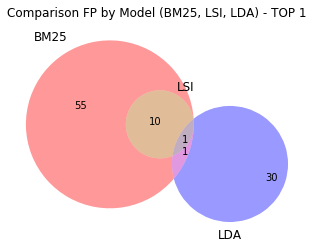

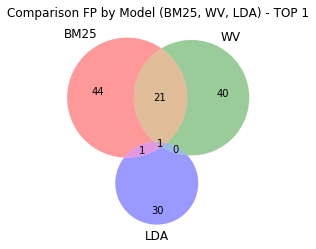

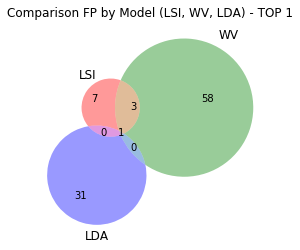

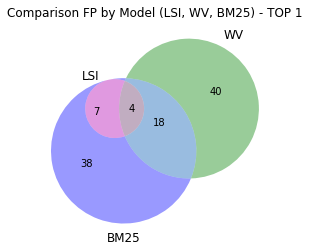

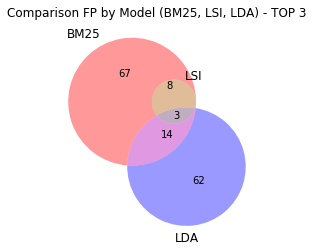

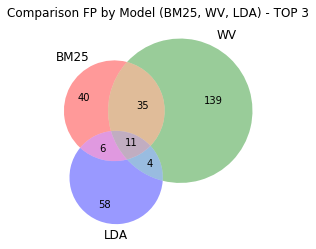

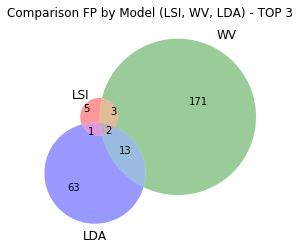

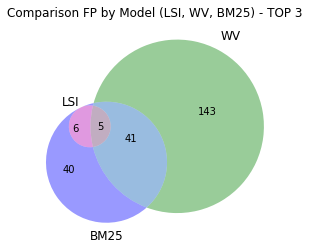

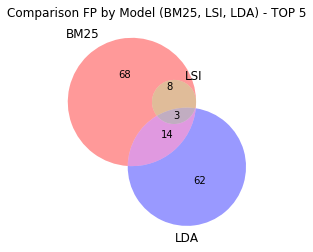

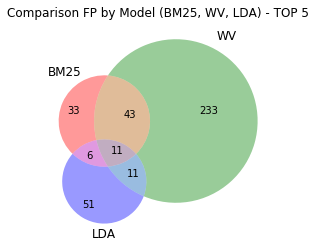

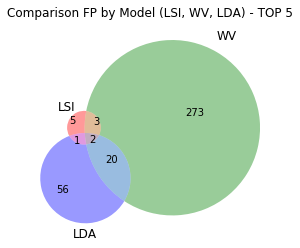

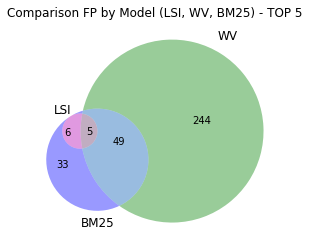

In [90]:
bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FP')
bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'FP')
bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FP')

aux_functions.plot_venn_diagrams(1, bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(3, bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, 'FP')
print('====================')
aux_functions.plot_venn_diagrams(5, bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, 'FP')

##### Exclusive Traces

In [91]:
print("TOP 1 ------------------------------")
bm25_fp_exc_set_t1, lsi_fp_exc_set_t1, lda_fp_exc_set_t1, wv_fp_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fp_set_t1, lsi_fp_set_t1, lda_fp_set_t1, wv_fp_set_t1, traces_type='FP')

print("\n\nTOP 3 ------------------------------")
bm25_fp_exc_set_t3, lsi_fp_exc_set_t3, lda_fp_exc_set_t3, wv_fp_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fp_set_t3, lsi_fp_set_t3, lda_fp_set_t3, wv_fp_set_t3, traces_type='FP')

print("\n\nTOP 5 -------------------------------")
bm25_fp_exc_set_t5, lsi_fp_exc_set_t5, lda_fp_exc_set_t5, wv_fp_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fp_set_t5, lsi_fp_set_t5, lda_fp_set_t5, wv_fp_set_t5, traces_type='FP')

TOP 1 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 37


LSI Exclusive FP:
len(lsi_exc_set): 0


LDA Exclusive FP:
len(lda_exc_set): 30


WV Exclusive FP:
len(wv_exc_set): 40


TOP 3 ------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 35


LSI Exclusive FP:
len(lsi_exc_set): 0


LDA Exclusive FP:
len(lda_exc_set): 58


WV Exclusive FP:
len(wv_exc_set): 139


TOP 5 -------------------------------
BM25 Exclusive FP:
len(bm25_exc_set): 28


LSI Exclusive FP:
len(lsi_exc_set): 0


LDA Exclusive FP:
len(lda_exc_set): 51


WV Exclusive FP:
len(wv_exc_set): 233


#### False Negatives Analysis

TOP 1 -----------------------------------


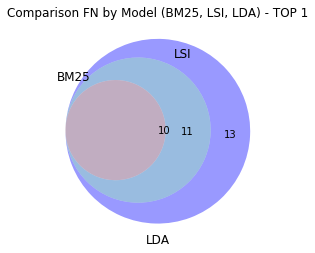

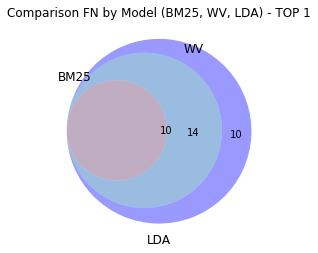

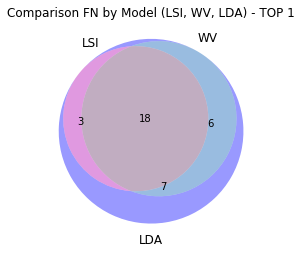

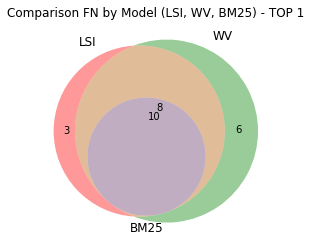



TOP 5 -----------------------------------


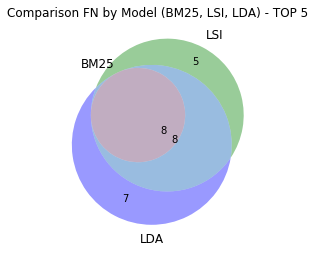

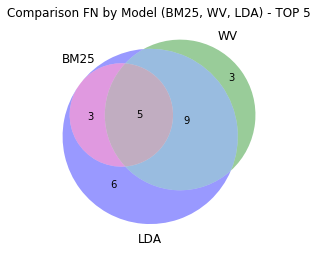

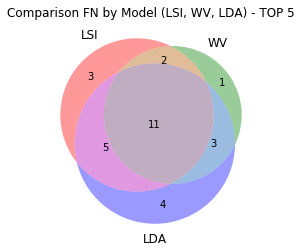

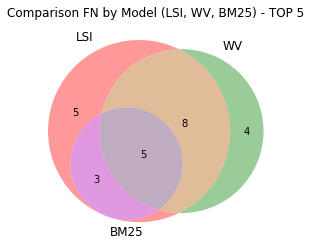

In [92]:
bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1 = aux_functions.get_traces_set(retrieved_traces_df, 1, 'FN')
bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3 = aux_functions.get_traces_set(retrieved_traces_df, 3, 'FN')
bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5 = aux_functions.get_traces_set(retrieved_traces_df, 5, 'FN')

print("TOP 1 -----------------------------------")
aux_functions.plot_venn_diagrams(1, bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, 'FN')

print("\n\nTOP 5 -----------------------------------")
aux_functions.plot_venn_diagrams(5, bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, 'FN')

##### Exclusive Traces

In [93]:
print("TOP 1 ------------------------------")
bm25_fn_exc_set_t1, lsi_fn_exc_set_t1, lda_fn_exc_set_t1, wv_fn_exc_set_t1 =  aux_functions.get_exclusive_traces(bm25_fn_set_t1, lsi_fn_set_t1, lda_fn_set_t1, wv_fn_set_t1, traces_type='FN', verbose=True)

print("\n\nTOP 3 -------------------------------")
bm25_fn_exc_set_t3, lsi_fn_exc_set_t3, lda_fn_exc_set_t3, wv_fn_exc_set_t3 =  aux_functions.get_exclusive_traces(bm25_fn_set_t3, lsi_fn_set_t3, lda_fn_set_t3, wv_fn_set_t3, traces_type='FN', verbose=True)

print("\n\nTOP 5 -------------------------------")
bm25_fn_exc_set_t5, lsi_fn_exc_set_t5, lda_fn_exc_set_t5, wv_fn_exc_set_t5 =  aux_functions.get_exclusive_traces(bm25_fn_set_t5, lsi_fn_set_t5, lda_fn_set_t5, wv_fn_set_t5, traces_type='FN', verbose=True)

TOP 1 ------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


set()

len(lsi_exc_set): 0


LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1294887),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1334844),
 ('new_awesome_bar', 1337682),
 ('new_awesome_bar', 1365887)}

len(lda_exc_set): 7


WV Exclusive FN:


set()

len(wv_exc_set): 0


TOP 3 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


{('new_awesome_bar', 1276120),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1353831)}

len(lsi_exc_set): 3


LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1365887)}

len(lda_exc_set): 4


WV Exclusive FN:


{('new_awesome_bar', 1335992)}

len(wv_exc_set): 1


TOP 5 -------------------------------
BM25 Exclusive FN:


set()

len(bm25_exc_set): 0


LSI Exclusive FN:


{('new_awesome_bar', 1276120),
 ('new_awesome_bar', 1296366),
 ('new_awesome_bar', 1353831)}

len(lsi_exc_set): 3


LDA Exclusive FN:


{('context_menu', 1248267),
 ('new_awesome_bar', 1279864),
 ('new_awesome_bar', 1301421),
 ('new_awesome_bar', 1365887)}

len(lda_exc_set): 4


WV Exclusive FN:


{('new_awesome_bar', 1335992)}

len(wv_exc_set): 1


##### Detail False Negatives

In [94]:
display(aux_functions.detail_features_br(lda_fn_exc_set_t1, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lda_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

,feat,br,br_summary
0,new_awesome_bar,1365887,Can't open resource:///modules/ from the location bar
1,new_awesome_bar,1294887,Middle clicking search results does not open a new tab
2,new_awesome_bar,1337682,using ctrl / shift + enter seems to save the URL to a hidden clipboard that populates when hitting enter (hard to describe).
3,new_awesome_bar,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word
4,new_awesome_bar,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input
5,context_menu,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
6,new_awesome_bar,1334844,"Address bar uses most recently entered URL, not URL in bar, after using CTRL+ENTER"


,feat,br,br_summary
0,context_menu,1248267,"Right click on bookmark item of ""Recently Bookmarked"" should show regular places context menu"
1,new_awesome_bar,1365887,Can't open resource:///modules/ from the location bar
2,new_awesome_bar,1301421,browser.fixup.dns_first_for_single_words prevents location bar search suggestions even when there's more than one token and/or the first token is not a single word
3,new_awesome_bar,1279864,The new location bar autocomplete drop down menu starting from 48 has serious performance issue and often blocks user's <Enter> input


In [95]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t1]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lda_model().get_sim_matrix().loc[:,[b for f,b in lda_fn_exc_set_t5]]))

Bug_Number,1365887,1294887,1337682,1301421,1279864,1248267,1334844
feat_name,,,,,,,
new_awesome_bar,0.800213,0.993985,0.965392,0.81112,0.87502,0.819873,0.994299
windows_child_mode,0.380811,0.451453,0.430215,0.425339,0.431626,0.38372,0.403396
apz_async_scrolling,0.592938,0.0375015,0.233028,0.510611,0.42405,0.555395,0.0306721
browser_customization,0.147356,0.065498,0.0635576,0.0813945,0.0738469,0.084284,0.0567898
pdf_viewer,0.192325,0.0560188,0.194899,0.352992,0.306042,0.181913,0.0668428
context_menu,0.844958,0.397656,0.573095,0.780128,0.721338,0.817121,0.391743
w10_comp,0.801084,0.994249,0.965769,0.81199,0.875716,0.820732,0.994476
tts_in_desktop,0.0584014,0.0452432,0.0417733,0.0539073,0.0481993,0.0569175,0.0378915
tts_in_rm,0.0586117,0.0453996,0.0419414,0.0541195,0.0483972,0.0571287,0.0380373


Bug_Number,1248267,1365887,1301421,1279864
feat_name,,,,
new_awesome_bar,0.819873,0.800213,0.81112,0.87502
windows_child_mode,0.38372,0.380811,0.425339,0.431626
apz_async_scrolling,0.555395,0.592938,0.510611,0.42405
browser_customization,0.084284,0.147356,0.0813945,0.0738469
pdf_viewer,0.181913,0.192325,0.352992,0.306042
context_menu,0.817121,0.844958,0.780128,0.721338
w10_comp,0.820732,0.801084,0.81199,0.875716
tts_in_desktop,0.0569175,0.0584014,0.0539073,0.0481993
tts_in_rm,0.0571287,0.0586117,0.0541195,0.0483972


##### Word Vector FN Details

In [96]:
display(aux_functions.detail_features_br(wv_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(wv_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

,feat,br,br_summary
0,new_awesome_bar,1335992,Search with default search engine stops working


,feat,br,br_summary
0,new_awesome_bar,1335992,Search with default search engine stops working


In [97]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t3]]))
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_word2vec_model().get_sim_matrix().loc[:,[b for f,b in wv_fn_exc_set_t5]]))

Bug_Number,1335992
feat_name,
new_awesome_bar,0.891035
windows_child_mode,0.883903
apz_async_scrolling,0.848496
browser_customization,0.786548
pdf_viewer,0.789447
context_menu,0.882714
w10_comp,0.856303
tts_in_desktop,0.864171
tts_in_rm,0.862273


Bug_Number,1335992
feat_name,
new_awesome_bar,0.891035
windows_child_mode,0.883903
apz_async_scrolling,0.848496
browser_customization,0.786548
pdf_viewer,0.789447
context_menu,0.882714
w10_comp,0.856303
tts_in_desktop,0.864171
tts_in_rm,0.862273


##### LSI FN Details

In [98]:
display(aux_functions.detail_features_br(lsi_fn_exc_set_t3, features, bugreports)[['feat','br','br_summary']])
display(aux_functions.detail_features_br(lsi_fn_exc_set_t5, features, bugreports)[['feat','br','br_summary']])

,feat,br,br_summary
0,new_awesome_bar,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
1,new_awesome_bar,1353831,OneOff block in search bar doesn't update text if Customize was opened at least once
2,new_awesome_bar,1276120,Autocomplete suggestions just don't go away after Win+Down


,feat,br,br_summary
0,new_awesome_bar,1296366,"Ctrl+Click awesomebar entry with ""Switch to Tab"" doesn't open new tab"
1,new_awesome_bar,1353831,OneOff block in search bar doesn't update text if Customize was opened at least once
2,new_awesome_bar,1276120,Autocomplete suggestions just don't go away after Win+Down


In [99]:
display(aux_functions.highlight_df(exp_vol_intersec_strat_runner.get_lsi_model().get_sim_matrix().loc[:,[b for f,b in lsi_fn_exc_set_t3]]))

Bug_Number,1296366,1353831,1276120
feat_name,,,
new_awesome_bar,0.693017,0.718223,0.631222
windows_child_mode,0.0730247,0.129156,0.334486
apz_async_scrolling,0.209625,0.0897257,0.0483971
browser_customization,0.0775948,0.66792,0.0649509
pdf_viewer,0.0358291,0.00762833,0.0230393
context_menu,0.352094,0.259239,0.356687
w10_comp,0.719517,0.110296,0.726589
tts_in_desktop,0.0637309,0.165414,0.0498351
tts_in_rm,0.0713896,0.170659,0.21255


### Recovery Effort Index (REI)

In [100]:
orc_vol_only_precision = 36.56
def calculate_rei(row):
    if row['precision'] > 0:
        return orc_vol_only_precision/row['precision']
    return 0

In [101]:
retrieved_traces_df['rei'] = retrieved_traces_df.apply(lambda row : calculate_rei(row), axis=1)
retrieved_traces_df[['top','model','precision','recall','rei']].groupby('model').rei.mean()

model
bm25          1.573069
lda           1.994544
lsi           0.674912
wordvector    4.696553
Name: rei, dtype: float64

### Goodness Scale

In [102]:
aux_functions.calculate_goodness(evals_df_2_1)

,model,precision,recall,precision_goodness,recall_goodness
0,bm25,17.55,81.08,-,Excellent
1,lsi,28.32,76.28,Acceptable,Good
2,lda,5.08,39.90,-,-
3,wordvector,9.26,56.87,-,-


### Delete Variables

## Volunteers Only Strategy

In [ ]:
vol_strat_runner = feat_br_strat_runner.Feat_BR_Vol_Strat_Runner()
vol_strat_runner.execute()

evaluator_4 = vol_strat_runner.get_evaluator() 
evals_df_4 = vol_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_4.head()

In [ ]:
evals_df_4_1 = evals_df_4[evals_df_4.top != 19.0]
aux_functions.highlight_df( evals_df_4_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_4.plot_evaluations_3(evals_df_4_1, title='BR-Feat Traceability Recovery - Volunteers-Only Strategy')

In [ ]:
evaluator_4.plot_evaluations_4(evals_df_4_1)

In [ ]:
evaluator_4.plot_evaluations_5(evals_df_4_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=vol_strat_runner.get_oracle(), evals_df = evals_df_4)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces_vol = aux_functions.get_oracle_true_positives(vol_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces_vol)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces_t1_vol = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t1_vol = oracle_true_traces_vol - all_captured_traces_t1_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t1_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t1_vol), len(oracle_true_traces_vol), len(not_captured_traces_t1_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces_t3_vol = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t3_vol = oracle_true_traces_vol - all_captured_traces_t3_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t3_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t3_vol), len(oracle_true_traces_vol), len(not_captured_traces_t3_vol)/len(oracle_true_traces_vol)*100))

print('\n\nTOP 5 --------------------------')
all_captured_traces_t5_vol = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces_t5_vol = oracle_true_traces_vol - all_captured_traces_t5_vol
print('len(not_captured_traces): {}'.format(len(not_captured_traces_t5_vol)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces_t5_vol), len(oracle_true_traces_vol), len(not_captured_traces_t5_vol)/len(oracle_true_traces_vol)*100))

#### Details of not captured traces

In [ ]:
aux_functions.detail_features_br(not_captured_traces, features=features, bugreports=bugreports)

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all_t1_vol = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t1_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t1_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t1_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all_t3_vol = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t3_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t3_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t3_vol)/len(oracle_true_traces_vol) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all_t5_vol = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all_t5_vol)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all_t5_vol), len(oracle_true_traces_vol), len(traces_captured_by_all_t5_vol)/len(oracle_true_traces_vol) *100))

### REI Calculation

In [ ]:
evals_df_4_2 = evals_df_4[(evals_df_4.top == 19.0) & (evals_df_4.sim_threshold == 0.0)]
evals_df_4_2.head()

In [ ]:
volunteers_perc_precision = 36.56
lsi_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lsi'].iloc[0,:].perc_precision
lda_rei = volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'lda'].iloc[0,:].perc_precision 
bm25_rei= volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'bm25'].iloc[0,:].perc_precision 
wv_rei =  volunteers_perc_precision / evals_df_4_2[evals_df_4_2.model == 'wordvector'].iloc[0,:].perc_precision

print('LSI REI: {:2.4}%'.format(lsi_rei))
print('LDA REI: {:2.4}%'.format(lda_rei))
print('BM25 REI: {:2.4}%'.format(bm25_rei))
print('WV REI: {:2.4}%'.format(wv_rei))

### Delete Variables

## Union Strategy

In [ ]:
exp_vol_union_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Vol_Union_Strat_Runner()
exp_vol_union_strat_runner.execute()

evaluator_1 = exp_vol_union_strat_runner.get_evaluator() 
evals_df_1 = exp_vol_union_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_1.head()

### Plots

In [ ]:
evaluator_1.plot_evaluations_3(evals_df_1, title='BR-Feat Traceability Recovery - Exp-Vol Union Strategy')

In [ ]:
evaluator_1.plot_evaluations_4(evals_df_1)

In [ ]:
evaluator_1.plot_evaluations_5(evals_df_1)

### Delete Variables

## Expert Only Strategy

In [ ]:
exp_strat_runner = feat_br_strat_runner.Feat_BR_Exp_Strat_Runner()
exp_strat_runner.execute()

evaluator_3 = exp_strat_runner.get_evaluator() 
evals_df_3 = exp_strat_runner.get_evals_df()

### Results

In [ ]:
evals_df_3.head()

In [ ]:
evals_df_3_1 = evals_df_3[evals_df_3.top != 19.0]
aux_functions.highlight_df( evals_df_3_1[['model','perc_precision','perc_recall','perc_fscore','top']].groupby(['model','top']).mean())

### Plots

In [ ]:
evaluator_3.plot_evaluations_3(evals_df_3_1, title='BR-Feat Traceability Recovery - Expert-Only Strategy')

In [ ]:
evaluator_3.plot_evaluations_4(evals_df_3_1)

In [ ]:
evaluator_3.plot_evaluations_5(evals_df_3_1)

### Retrieved Traces - Similarity Threshold 0.0

In [ ]:
retrieved_traces_df = aux_functions.get_retrieved_traces_df(oracle=exp_strat_runner.get_oracle(), evals_df = evals_df_3)
retrieved_traces_df.head(50)

### Oracle True Traces

In [ ]:
oracle_true_traces = aux_functions.get_oracle_true_positives(exp_strat_runner)
print('len(oracle_true_traces): {}'.format(len(oracle_true_traces)))

### Traces Not Captured by Any Technique

In [ ]:
print('TOP 1 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=1, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 3 --------------------------')
all_captured_traces = aux_functions.get_captured_traces_union(top_value=3, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

print('\n\nTOP 5 --------------------------')
#from modules.utils import firefox_dataset_p2 as fd
all_captured_traces = aux_functions.get_captured_traces_union(top_value=5, retrieved_traces_df=retrieved_traces_df)
not_captured_traces = oracle_true_traces - all_captured_traces
#aux_functions.detail_features_br(not_captured_traces, features=fd.Datasets.read_features_df(), bugreports=fd.Datasets.read_selected_bugreports_df())
print('len(not_captured_traces): {}'.format(len(not_captured_traces)))
print('percent not_captured_traces: {}/{} * 100 : {:2.4}%'.format(len(not_captured_traces), len(oracle_true_traces), len(not_captured_traces)/len(oracle_true_traces)*100))

### Traces Captured by Every Technique

In [ ]:
print('TOP 1 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(1, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 3 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(3, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

print('\n\nTOP 5 -----------------------')
traces_captured_by_all = aux_functions.get_captured_traces_intersec(5, retrieved_traces_df=retrieved_traces_df)
print('len(traces_captured_by_all): {}'.format(len(traces_captured_by_all)))
print('percent traces_captured_by_all: {}/{} * 100 : {:2.4}%'.format(len(traces_captured_by_all), len(oracle_true_traces), len(traces_captured_by_all)/len(oracle_true_traces) *100))

### Delete Variables